# Freature Scalling -- Standardizaion
This Algorithm needs Standardization
* KNN
* K means
* PCA
* ANN
* GD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df = df[['total_bill','tip','size']]
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


# x & y splite 

In [6]:
x = df.drop("size",axis=1)
y = df[['size']]

x.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [7]:
 y.head()

,size
0,2
1,3
2,3
3,2
4,4


# Train Test Splite

In [8]:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

xtrain.shape,ytrain.shape

((195, 2), (195, 1))

# Standard Scaller

In [9]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

In [30]:
scaller.fit(xtrain)

xtrain_scalled = scaller.transform(xtrain)
xtest_scalled = scaller.transform(xtest)

scaller.mean_

array([19.53061538,  2.93492308])

In [22]:
xtrain_scalled

array([[-2.86119371e-01, -1.47443803e+00],
       [ 2.69590494e-02, -7.16125310e-01],
       [ 1.37161960e+00,  1.19880579e+00],
       [-6.22847600e-01,  4.98471295e-02],
       [-3.67204429e-01, -3.33139090e-01],
       [-1.34810840e+00, -1.14506988e+00],
       [ 2.36716393e+00,  4.98471295e-02],
       [ 1.30567735e-01,  1.58179201e+00],
       [ 2.44312053e-01,  1.04561130e+00],
       [-1.03615616e+00, -9.68896215e-01],
       [-1.09809614e+00, -9.22937869e-01],
       [ 1.49775192e+00, -1.35188244e+00],
       [-7.80512991e-01, -1.48209775e+00],
       [-1.00237072e+00, -7.16125310e-01],
       [ 3.63687278e-01,  4.98471295e-02],
       [ 1.44932612e+00,  2.34776445e+00],
       [-3.32292807e-01,  8.15819569e-01],
       [-3.93106601e-01, -5.32291925e-01],
       [-1.38302002e+00,  1.69668787e+00],
       [-2.27557940e-01,  4.98471295e-02],
       [-6.91544663e-01, -2.48882122e-01],
       [-7.96279530e-01, -1.09911153e+00],
       [ 1.38738614e+00,  1.87722169e-01],
       [-1.

**Scalled data in numpy array format thats whay convertng the array into DataFrame**

In [31]:
xtrain_scalled = pd.DataFrame(xtrain_scalled,columns=xtrain.columns)
xtest_scalled = pd.DataFrame(xtest_scalled,columns=xtest.columns)
xtrain_scalled

,total_bill,tip
0,-0.286119,-1.474438
1,0.026959,-0.716125
2,1.371620,1.198806
3,-0.622848,0.049847
4,-0.367204,-0.333139
...,...,...
190,-0.605955,-0.716125
191,0.825422,0.157083
192,-0.232063,0.432833
193,-1.065437,-1.290605


In [32]:
xtrain.describe()

,total_bill,tip
count,195.000000,195.000000
mean,19.530615,2.934923
std,8.902420,1.308890
min,5.750000,1.000000
25%,13.325000,2.000000
50%,17.290000,2.750000
75%,23.390000,3.500000
max,48.330000,9.000000


In [33]:
np.round(xtrain.describe())

,total_bill,tip
count,195.0,195.0
mean,20.0,3.0
std,9.0,1.0
min,6.0,1.0
25%,13.0,2.0
50%,17.0,3.0
75%,23.0,4.0
max,48.0,9.0


In [34]:
np.round(xtrain_scalled.describe())

,total_bill,tip
count,195.0,195.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-1.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,0.0,0.0
max,3.0,5.0


# Effect of Scalling

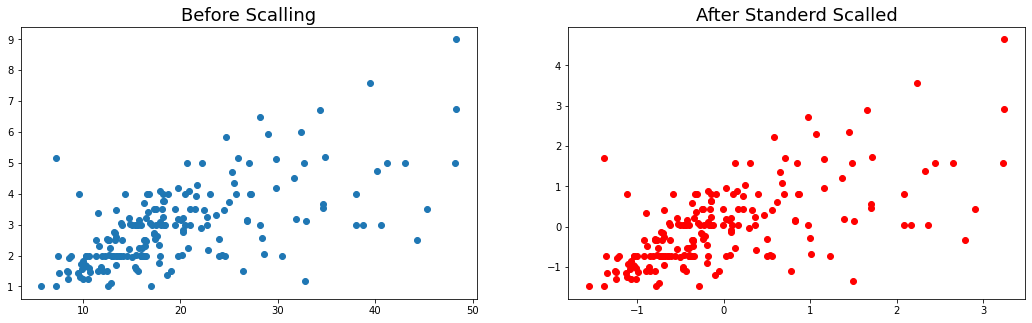

In [36]:


fig,(ax1,ax2)  =  plt.subplots(ncols=2,figsize=(18,5))

ax1.set_title("Before Scalling",fontsize=18)
ax1.scatter(xtrain['total_bill'],xtrain['tip'])


ax2.set_title("After Standerd Scalled",fontsize=18)
ax2.scatter(xtrain_scalled['total_bill'],xtrain_scalled['tip'],color='red')


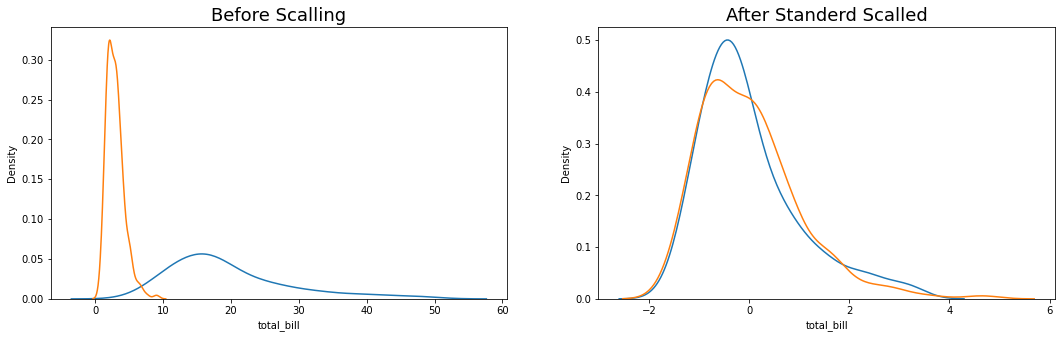

In [37]:
fig ,(ax1,ax2)  =  plt.subplots(ncols=2,figsize=(18,5))

ax1.set_title("Before Scalling",fontsize=18)
sns.kdeplot(xtrain['total_bill'],ax=ax1)
sns.kdeplot(xtrain['tip'],ax=ax1)


ax2.set_title("After Standerd Scalled",fontsize=18)
sns.kdeplot(xtrain_scalled['total_bill'],ax=ax2)
sns.kdeplot(xtrain_scalled['tip'],ax=ax2)
plt.show()

# Effect of Outlier

**Adding 3 outlier data into the dataste**

In [38]:
df_outlier = df.append(pd.DataFrame({'total_bill':[1,90,100], 'tip':[70,100,90],'size':[2,3,4] }))
df_outlier.shape

C:\Users\Nazrul Amin Seasun\AppData\Local\Temp\ipykernel_3484\3018235776.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_outlier = df.append(pd.DataFrame({'total_bill':[1,90,100], 'tip':[70,100,90],'size':[2,3,4] }))


(247, 3)

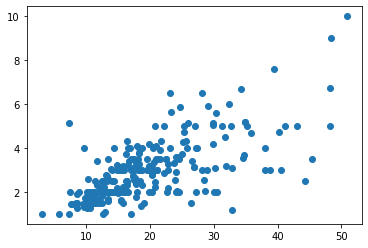

In [39]:
plt.scatter(df['total_bill'],df['tip'])

In [40]:
x_2 = df_outlier.drop('size',axis=1)
y_2  = df_outlier['size']

x_2.shape,y_2.shape

((247, 2), (247,))

# what happed if we scalled outlier data?

In [41]:
from sklearn.model_selection import train_test_split

xtrain_2,xtest_2,ytrain_2,ytest_2 = train_test_split(x_2,y_2,test_size=0.2,random_state=1)

In [42]:
xtrain_2.shape,xtest_2.shape


((197, 2), (50, 2))

# StandardScaler in Outlier Data

In [47]:
from sklearn.preprocessing import StandardScaler

scall = StandardScaler()

scall.fit(xtrain_2)

xtrain_scalled_2 = scall.transform(xtrain_2)
xtest_scalled_2 = scall.transform(xtest_2)


In [48]:
#converting into data Frame

xtrain_scalled_2 = pd.DataFrame(xtrain_scalled_2,columns=xtrain_2.columns)
xtest_scalled_2 = pd.DataFrame(xtest_scalled_2,columns=xtest_2.columns)


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'After Scalling Outlier data'}, xlabel='total_bill', ylabel='tip'>

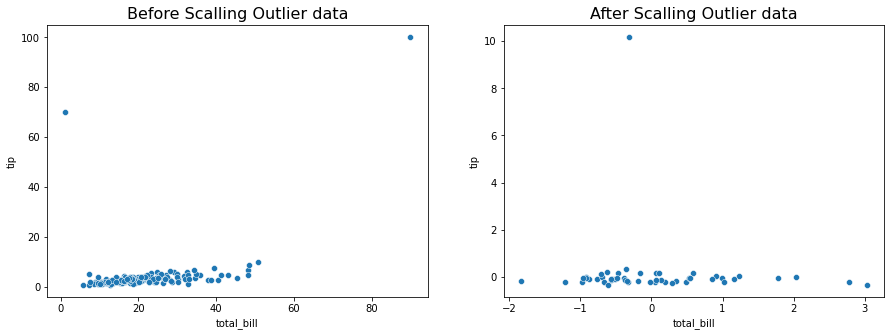

In [49]:

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("Before Scalling Outlier data",fontsize=16)
sns.scatterplot(xtrain_2['total_bill'],xtrain_2['tip'],ax=ax1)



ax2.set_title("After Scalling Outlier data",fontsize=16)
sns.scatterplot(xtrain_scalled_2['total_bill'],xtest_scalled_2['tip'],ax =ax2 )
